Theory (60 points)

1. (5 points) Define a qubit and explain the difference between a classical bit and a qubit.
2. (5 points) Explain the concept of superposition in quantum computing.
3. (5 points) Describe the process of measurement in quantum computing and its effect on a qubit.
4. (5 points) What is a quantum gate? Provide an example of a single qubit gate and explain its operation.
5. (10 points) Explain the following matrix operations, and describe their relevance to quantum computing: 
    a. matrix multiplication
    b. transpose
    c. conjugate
    d. hermitian conjugate
6. (5 points) Describe the Bloch sphere and explain how it is used to visualize quantum states.
7. (5 points) Define entanglement and provide an example of an entangled state.
8. (10 points) Explain the concept of tensor product in relation to multi-qubit states and gates. Provide an example of a multi-qubit gate.
9. (5 points) Given the following 2-qubit state: |01⟩, explicitly calculate the tensor product of the individual qubits and write the 2-qubit state as a vector.
10. (5 points) Explain the concept of a quantum circuit and how it is used to represent quantum computations.


                    answers
1) A qubit is the basic unit for quantum computer. A classical bit is a 2-level sytem of 0 or 1, whereas a qubit can be between the states of 0 and 1. In fact, a qubit can be defined by the equation |Ψ>= α|0> + β|1>
2) Superpoisiton is where a qubit is in 2 or more states at the same time and when it is measured, it collaspes into 1 single state.
3) In quantum computing, meausring is where you yeild probabilistic outcomes (which also defines superpoisition) that collaspes the qubit into a single outcome between 0 & 1, (|α>)^2 + (|β>)^2 = 1 (must equal 1).
4) A quantum gate is an operation that define qubits. For example, a single qubit gate such as the Pauli-X gate (the x gate shorten) flips the state of computional basis states, x|0>= |1> and x|1>= |0>: |Ψ>= α|0> + β|1> --> X|Ψ>= α|0> + β|0>.
5)  a. matrix multiplication: is a type of linear algebra that forms a matrix, matrix multipication defines the statevector equation: (|α>)^2 + (|β>)^2 =1 (similar to unitary) and helps yeild the probablistic outcomes.
    b. transpose: changes column into row and rows into columns i.e: row a= (1,2), column (a)= (1,2). this is used in bra form (the row form): <a|. But they use this form "ket, <a|" to measure the probability of the qubit
    c. conjugate:Is a matrix that has the conjugate equal to the original matrix. ie: (1+i)= 1-i 
    d. hermitian conjugate: (|a>*)T = (|a>)T  (which helps describes the measurements on a system)
6) Bloch sphere is a 3d sphere that visualizes where the superpoistion of the state vector could be located. Euler's ID helps us verify the 3D space by working it out mathematically and outting the restrictions .
7) entaglement is where a qubit is in one state at the same time. For example: |Ψ2Q>= (1/√2)(|00> + (1/√2)|11>), |Ψ1>|Ψ2> --> |Ψ1Ψ2> =α1α2|00> + α1β2|01> +β1α2|10> +β1β2|11>, assuming α1 = 0 or β2= 0, this cannot be true as α1β2 and β1α2 exist in the same states.
8) tensor product in a multi-qubit gate/states producess a 2^n matrix (n= # of qubits) so to describe n qubits, you'll need 2^n states and a 2^n * 2^n gates/matrix, typically unitary. For example:in a 2-qubit: |Ψ2>= (1/√4) (|00>+|01>+|10>+|11>) --> (|0>+|1>) tensor product (|0>+|1>) =|00>+|01>+|10>+|11> where each could equal 0 or 1.
9) |0> X (using this as tensor) |1>= |01>, (column)(1,0) X (0,1)= (1*(0,1), 0*(0,1))= column (0,1,0,0)
10) quantum circuits are a series of gates and qubits. The wires represents the qubits and the circuits are built left to right, with the gates (such as CNOT, Hadamard, X,Y, and Z) on the left acting first, the measuring of the ciruits are transformed into classical bits.

Coding (30 points)

1. (5 points) Given the following quantum circuit, write the corresponding qiskit code to create and draw it. |0⟩ X RX(π)
2. (5 points) Using qiskit, create a quantum circuit with two qubits. Apply an X gate to the first qubit and a Hadamard gate to the second qubit. Draw the circuit.
3. (5 points) Explain the difference between qiskit’s statevectorsimulator and qasmsimulator backends. When would you choose to use one over the other?
4. (10 points) Using qiskit, create a quantum circuit that generates a Bell state. Run the circuit using the qasmsimulator backend, and print the measurements counts.
5. (5 points) Plot a Bloch sphere representation of the state (1/√2)|0⟩ + (1/√2)|1⟩ using qiskit.

In [19]:
from qiskit import QuantumCircuit
import math

qc= QuantumCircuit(1,1)
qc.x(0)
qc.rx(math.pi,0)
qc.measure(0,0)
print(qc.draw())

     ┌───┐┌───────┐┌─┐
  q: ┤ X ├┤ Rx(π) ├┤M├
     └───┘└───────┘└╥┘
c: 1/═══════════════╩═
                    0 


In [21]:
from qiskit import QuantumCircuit
import math

qc= QuantumCircuit(2,2)
qc.x(0)
qc.h(1)
qc.measure(0,1)
print(qc.draw())

     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     ├───┤└╥┘
q_1: ┤ H ├─╫─
     └───┘ ║ 
c: 2/══════╩═
           1 


Statevector returns the data of the quantum state to 2^n, n being the qubit #, gives the output of a statevector, use this when you want to make a bloch sphere. Qasmsimulator returns the count of Qubits into bit, use this when you want to make a histogram.

In [28]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer
bc=QuantumCircuit(2,2)
bc.h(0)
bc.cnot(0,1)
bc.measure(0,1)

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(bc, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(bc)
print(bc.draw())
print(counts)

     ┌───┐     ┌─┐
q_0: ┤ H ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 2/═══════════╩═
                1 
{'00': 484, '10': 540}


   ┌────────────┐
q: ┤ U(π/2,0,1) ├
   └────────────┘
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


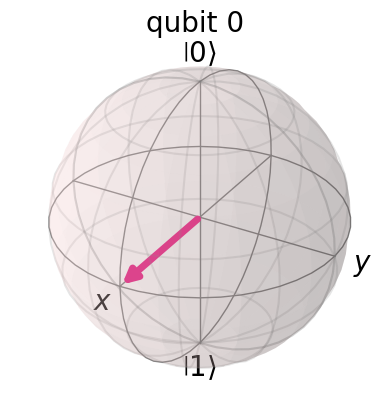

In [80]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.tools.visualization import plot_bloch_multivector, plot_bloch_vector
circ = QuantumCircuit(1)
circ.u(np.pi/2,0,1,0)
print(circ.draw())

from qiskit import Aer, execute
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=1)

backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend=backend, shots=1, memory=True)
job_result = job.result()

print(job_result.get_statevector(circ))
plot_bloch_multivector(job_result.get_statevector(circ))